In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

In [2]:
# data_df = pd.read_csv('Data.csv', sep = ';')
# clients_df = pd.read_csv('Clients.csv', sep = ';')
# region_dict_df = pd.read_csv('Region_dict.csv', sep = ';')

# можно загружать сразу из Excel
data_df  = pd.read_excel("Новый диплом датасет.xlsx", sheet_name = "Данные")
clients_df = pd.read_excel("Новый диплом датасет.xlsx", sheet_name = "Clients")
region_dict_df = pd.read_excel("Новый диплом датасет.xlsx", sheet_name = "Region_dict")

In [3]:
# Удаление строк с пустыми значениями из data_df
data_df = data_df.dropna()
# Удаление строк с пустыми значениями из clients_df
clients_df = clients_df.dropna()
# Удаление строк с пустыми значениями из region_dict_df
region_dict_df = region_dict_df.dropna()

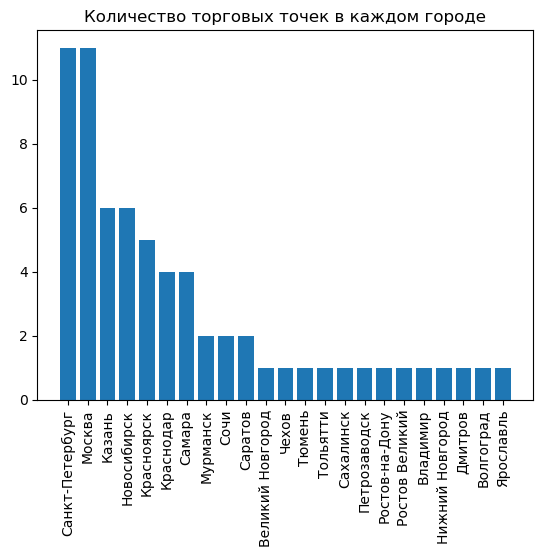

In [4]:
# можно взять исходные данные и отсортировать
df_reg_gr = region_dict_df.groupby('city').count()['id_trading_point'].reset_index().sort_values(by = 'id_trading_point', ascending = False)
plt.bar(df_reg_gr['city'], df_reg_gr['id_trading_point'])


# # Группировка данных по городу и подсчет количества торговых точек
# city_counts = final_table.groupby('city')['id_trading_point'].count()

# # Создание гистограммы
# plt.figure(figsize=(10, 6))
# plt.bar(city_counts.index, city_counts.values)
# plt.xlabel('Город')
# plt.ylabel('Количество торговых точек')
plt.title('Количество торговых точек в каждом городе')
plt.xticks(rotation=90)
plt.show()

In [5]:
#######################################################################################################################

In [6]:
# объединяем наши данные
df = data_df.merge(clients_df, on = 'id_client', how = 'outer')
df = df.merge(region_dict_df, on = 'id_trading_point')
df['amt_payment'] = df['amt_payment'].fillna(0)

# расчитываем для каждого клиента его покупки
df_cl = df.groupby(['id_client','id_trading_point','city']).agg({'id_order':'count', 'amt_payment':'sum'}).reset_index()
df_fin = df_cl.merge(clients_df[['id_client','dtime_ad','nflag_test']], on = 'id_client')


df_fin['nflag_paid'] = np.where(df_fin['amt_payment'] > 0, 1, 0)


In [7]:
# очищаем пустые торговые точки

zero_payment_points = []

for i in df_fin['id_trading_point'].unique():
    
    df_loc = df_fin[df_fin['id_trading_point']==i]
    sum_a = df_fin[(df_fin['id_trading_point']==i) & (df_fin['nflag_test']==0)].sum()['amt_payment'].sum()
    sum_b = df_fin[(df_fin['id_trading_point']==i) & (df_fin['nflag_test']==1)].sum()['amt_payment'].sum()
    if (sum_a == 0) | (sum_b == 0):
        zero_payment_points.append(i)
        
print(zero_payment_points)


empty_group_points = []

for i in df_fin['id_trading_point'].unique():
    
    c_a = df_fin[(df_fin['id_trading_point']==i) & (df_fin['nflag_test']==0)].count()['id_client']
    c_b = df_fin[(df_fin['id_trading_point']==i) & (df_fin['nflag_test']==1)].count()['id_client']
    #print(c_a)
    #print(c_b)
    if (c_a == 0) | (c_b == 0):
        empty_group_points.append(i)
        
print(empty_group_points)

# удаялем их
df_fin = df_fin[~df_fin['id_trading_point'].isin(empty_group_points + zero_payment_points)]

C:\Users\v_ush\AppData\Local\Temp\ipykernel_11436\3028429282.py:8: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sum_a = df_fin[(df_fin['id_trading_point']==i) & (df_fin['nflag_test']==0)].sum()['amt_payment'].sum()
C:\Users\v_ush\AppData\Local\Temp\ipykernel_11436\3028429282.py:9: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sum_b = df_fin[(df_fin['id_trading_point']==i) & (df_fin['nflag_test']==1)].sum()['amt_payment'].sum()
C:\Users\v_ush\AppData\Local\Temp\ipykernel_11436\3028429282.py:8: FutureWarning: The default value of num

[26.0, 739.0, 866.0, 46.0, 1099.0, 1015.0, 603.0, 810.0, 800.0, 228.0, 1.0, 13.0, 23.0, 4.0, 7.0]
[739.0, 866.0, 1099.0, 1015.0, 603.0, 810.0, 800.0, 228.0]


In [8]:
#######################################################################################################################

In [9]:
def test_calc(r1, r2, alpha=0.05):
    t, p = stats.ttest_ind(r1, r2)
    if p < alpha:
        print("Существует статистически значимая разница между средними")
    else:
        print("Нет статистически значимой разницы между средними")
    return t, p    

In [10]:
def mann_whitney_func(r1, r2, alpha=0.05):
    statistic, p = stats.mannwhitneyu(r1, r2, alternative='two-sided')
    if p < alpha:
        print("Существует статистически значимая разница между распределениями")
    else:
        print("Нет статистически значимой разницы между распределениями")
    return statistic, p     

In [11]:
########################################################################################################################

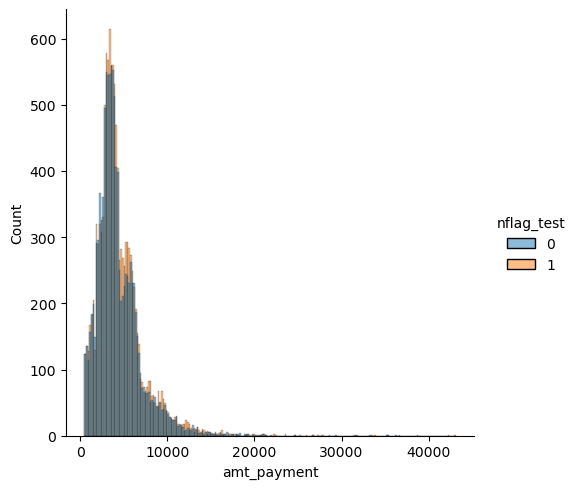

In [12]:
# смотрим общее распределение
import seaborn as sns
sns.displot(df_fin[df_fin['amt_payment'] > 0], x = 'amt_payment', hue = 'nflag_test')
plt.show()

# аналогично через цикл необходимо сделать для каждого города

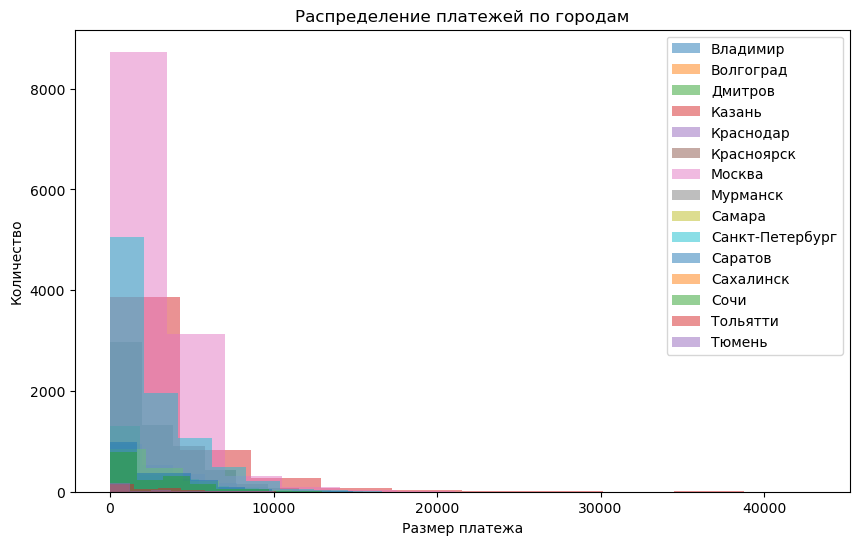

In [13]:
# Группировка данных по городам
grouped_data = df_fin.groupby('city')['amt_payment']

# Построение гистограмм распределения платежей для каждого города
plt.figure(figsize=(10, 6))
for city, payments in grouped_data:
    plt.hist(payments, bins=10, alpha=0.5, label=city)

# Добавление легенды и меток осей
plt.legend()
plt.xlabel('Размер платежа')
plt.ylabel('Количество')
plt.title('Распределение платежей по городам')

# Отображение графика
plt.show()

In [14]:
# теперь необходимо пройтись через каждый город и точку и провести тест:

In [15]:
df_result = pd.DataFrame()
for i in df_fin['city'].unique():
    df_loc = df_fin[df_fin['city']==i]
    
    for j in df_loc['id_trading_point'].unique():
        df_loc_f      = df_loc[df_loc['id_trading_point']==j]
        
        # и расчитать все метрики
        s_a,p_a  = test_calc(df_loc_f[df_loc_f['nflag_test']==1]['amt_payment'], df_loc_f[df_loc_f['nflag_test']==0]['amt_payment'])
        s_p,p_p  = test_calc(df_loc_f[df_loc_f['nflag_test']==1]['nflag_paid'], df_loc_f[df_loc_f['nflag_test']==0]['nflag_paid'])
        nflag_test = df_loc_f['nflag_test'].iloc[0]
        df_result = df_result.append({  'city':i, 'id_trading_point':j,
                                        'abs_ttest_s':s_a, 'abs_ttest_p':p_a, 'pr_ttest_s':s_p}, ignore_index=True)

Существует статистически значимая разница между средними
Существует статистически значимая разница между средними
Нет статистически значимой разницы между средними
Существует статистически значимая разница между средними
Существует статистически значимая разница между средними
Существует статистически значимая разница между средними
Нет статистически значимой разницы между средними
Нет статистически значимой разницы между средними
Нет статистически значимой разницы между средними
Нет статистически значимой разницы между средними
Существует статистически значимая разница между средними
Существует статистически значимая разница между средними
Существует статистически значимая разница между средними
Существует статистически значимая разница между средними
Существует статистически значимая разница между средними
Существует статистически значимая разница между средними
Существует статистически значимая разница между средними
Существует статистически значимая разница между средними
Существуе

C:\Users\v_ush\AppData\Local\Temp\ipykernel_11436\3598070458.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({  'city':i, 'id_trading_point':j,
C:\Users\v_ush\AppData\Local\Temp\ipykernel_11436\3598070458.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({  'city':i, 'id_trading_point':j,
C:\Users\v_ush\AppData\Local\Temp\ipykernel_11436\3598070458.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({  'city':i, 'id_trading_point':j,
C:\Users\v_ush\AppData\Local\Temp\ipykernel_11436\3598070458.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

In [16]:
df_result

,city,id_trading_point,abs_ttest_s,abs_ttest_p,pr_ttest_s
0,Санкт-Петербург,453.0,4.976910,6.983207e-07,5.541076
1,Санкт-Петербург,112.0,1.770712,7.683710e-02,2.197840
2,Санкт-Петербург,117.0,3.398196,7.003817e-04,3.673055
3,Санкт-Петербург,309.0,1.228455,2.198834e-01,1.374431
4,Санкт-Петербург,576.0,1.774073,7.628783e-02,1.535345
5,Санкт-Петербург,900.0,3.686914,2.452534e-04,3.718411
6,Санкт-Петербург,213.0,2.750752,6.168215e-03,2.524813
7,Санкт-Петербург,801.0,2.099991,3.630501e-02,2.475441
8,Санкт-Петербург,573.0,4.016569,7.294074e-05,4.888660
9,Санкт-Петербург,891.0,2.135593,3.346204e-02,2.176540


In [17]:
###############################################################################################################################

In [18]:
# Отбрасываю торговые точки без платежей
df_filtered = df_fin[df_fin['amt_payment'] > 0]

# Отбрасываю торговые точки с пустой или контрольной/тестовой группой
df_filtered = df_filtered.groupby('id_trading_point').filter(lambda x: x['nflag_test'].nunique() == 2)

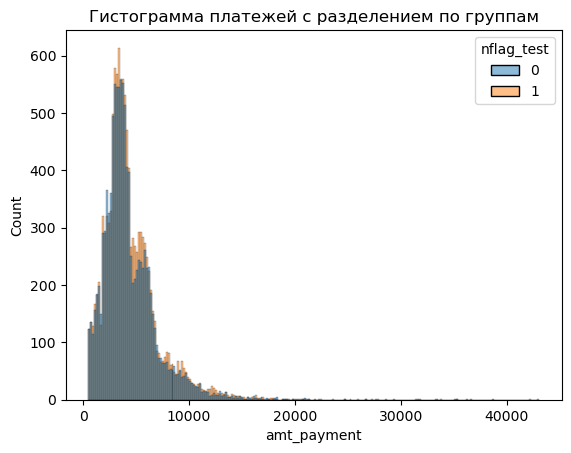

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Фильтрация данных
df_filtered = df_fin[df_fin['amt_payment'] > 0]

# Построение гистограммы с указанием групп
sns.histplot(data=df_filtered, x='amt_payment', hue='nflag_test')
plt.title('Гистограмма платежей с разделением по группам')
plt.show()


In [20]:
r1 = df_filtered[df_filtered['nflag_test'] == 1]['amt_payment']
r2 = df_filtered[df_filtered['nflag_test'] == 0]['amt_payment']
alpha = 0.05

t, p = test_calc(r1, r2, alpha)

if p < alpha:
    print("Существует статистически значимая разница между средними платежами")
else:
    print("Нет статистически значимой разницы между средними платежами")
    
    
# Тут я создал две выборки `r1` и `r2`, содержащие значения платежей для групп "тест" и "контроль" 
# в DataFrame `df_filtered`. Затем вызвал функцию `test_calc` с этими выборками и указал уровень значимости `alpha`.
# Получил значения t-критерия и p-value и сравнил p-value с уровнем значимости. Если p-value меньше уровня значимости,
# выводится сообщение о статистически значимой разнице между средними платежами. В противном случае выводится 
# сообщение о отсутствии статистически значимой разницы.

Существует статистически значимая разница между средними
Существует статистически значимая разница между средними платежами


In [21]:
r1 = df_filtered[df_filtered['nflag_test'] == 1]['nflag_paid']
r2 = df_filtered[df_filtered['nflag_test'] == 0]['nflag_paid']
alpha = 0.05

t, p = test_calc(r1, r2, alpha)

if p < alpha:
    print("Существует статистически значимая разница в конверсии в платеж")
else:
    print("Нет статистически значимой разницы в конверсии в платеж")
    
# Тут я создал две выборки `r1` и `r2`, содержащие значения конверсии в платеж (ряды нулей и единиц) 
# для групп "тест" и "контроль" в DataFrame `df_filtered`. Затем вызвал функцию `test_calc` с этими выборками и указал 
# уровень значимости `alpha`. Получил значения t-критерия и p-value и сравнил p-value с уровнем значимости. 
# Если p-value меньше уровня значимости, выводится сообщение о статистически значимой разнице в конверсии в платеж.
# В противном случае выводится сообщение о отсутствии статистически значимой разницы.

Нет статистически значимой разницы между средними
Нет статистически значимой разницы в конверсии в платеж


C:\Users\v_ush\AppData\Local\Temp\ipykernel_11436\3133867677.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p = stats.ttest_ind(r1, r2)


In [22]:
r1 = df_filtered[df_filtered['nflag_test'] == 1]['amt_payment']
r2 = df_filtered[df_filtered['nflag_test'] == 0]['amt_payment']
alpha = 0.05

statistic, p = mann_whitney_func(r1, r2, alpha)

if p < alpha:
    print("Существует статистически значимая разница между распределениями платежей")
else:
    print("Нет статистически значимой разницы между распределениями платежей")
    
# Создал две выборки `r1` и `r2`, содержащие значения платежей для групп "тест" и "контроль" в DataFrame 
# `df_filtered`. Затем вызывал функцию `mann_whitney_func` с этими выборками и указал уровень значимости `alpha`.
# Получил значение статистики и p-value и сравнил p-value с уровнем значимости. Если p-value меньше уровня значимости,
# выводится сообщение о статистически значимой разнице между распределениями платежей. В противном случае выводится сообщение 
# о отсутствии статистически значимой разницы.

Существует статистически значимая разница между распределениями
Существует статистически значимая разница между распределениями платежей


In [23]:
###############################################################################################################################

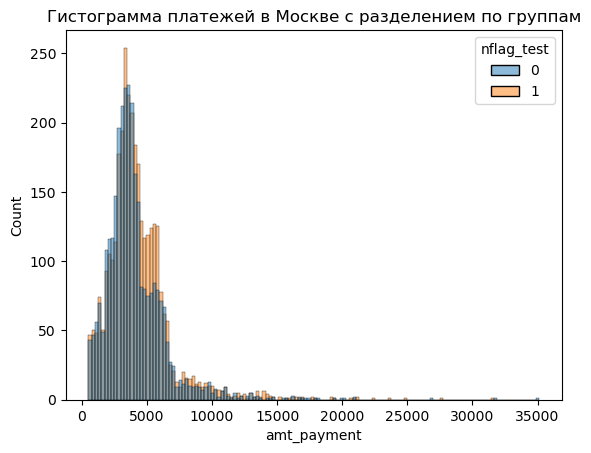

Нет статистически значимой разницы между средними
В Москве нет статистически значимой разницы в конверсии в платеж


C:\Users\v_ush\AppData\Local\Temp\ipykernel_11436\3133867677.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p = stats.ttest_ind(r1, r2)


In [24]:
df_moscow = df_filtered[df_filtered['city'] == 'Москва']

# Построил гистограммы платежей с разделением по группам "тест" и "контроль"
sns.histplot(data=df_moscow, x='amt_payment', hue='nflag_test')
plt.title('Гистограмма платежей в Москве с разделением по группам')
plt.show()

# Вычислил статистическую значимость разницы конверсии в платеж
r1 = df_moscow[df_moscow['nflag_test'] == 1]['nflag_paid']
r2 = df_moscow[df_moscow['nflag_test'] == 0]['nflag_paid']
alpha = 0.05

t, p = test_calc(r1, r2, alpha)

if p < alpha:
    print("В Москве существует статистически значимая разница в конверсии в платеж")
else:
    print("В Москве нет статистически значимой разницы в конверсии в платеж")
    
    
# В этом коде я фильтрую DataFrame `df_filtered` только для строк со значением "Москва" в столбце "city" и сохраняю результат
# в `df_moscow`. Затем строю гистограмму платежей с разделением по группам "тест" и "контроль". После этого вычисляю 
# статистическую значимость разницы в конверсии в платеж для Москвы с помощью функции `test_calc`.

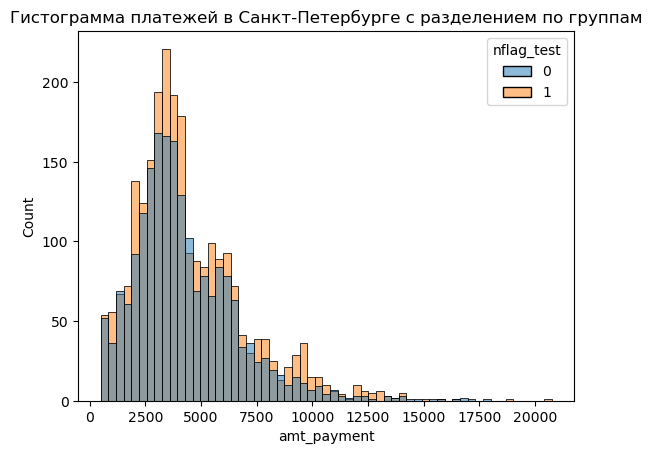

Нет статистически значимой разницы между средними
В Санкт-Петербурге нет статистически значимой разницы в конверсии в платеж


C:\Users\v_ush\AppData\Local\Temp\ipykernel_11436\3133867677.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p = stats.ttest_ind(r1, r2)


In [25]:
# Фильтрация данных только для Санкт-Петербурга
df_spb = df_filtered[df_filtered['city'] == 'Санкт-Петербург']

# Построил гистограммы платежей с разделением по группам "тест" и "контроль"
sns.histplot(data=df_spb, x='amt_payment', hue='nflag_test')
plt.title('Гистограмма платежей в Санкт-Петербурге с разделением по группам')
plt.show()

# Вычислил статистические значимости разницы конверсии в платеж
r1 = df_spb[df_spb['nflag_test'] == 1]['nflag_paid']
r2 = df_spb[df_spb['nflag_test'] == 0]['nflag_paid']
alpha = 0.05

t, p = test_calc(r1, r2, alpha)

if p < alpha:
    print("В Санкт-Петербурге существует статистически значимая разница в конверсии в платеж")
else:
    print("В Санкт-Петербурге нет статистически значимой разницы в конверсии в платеж")

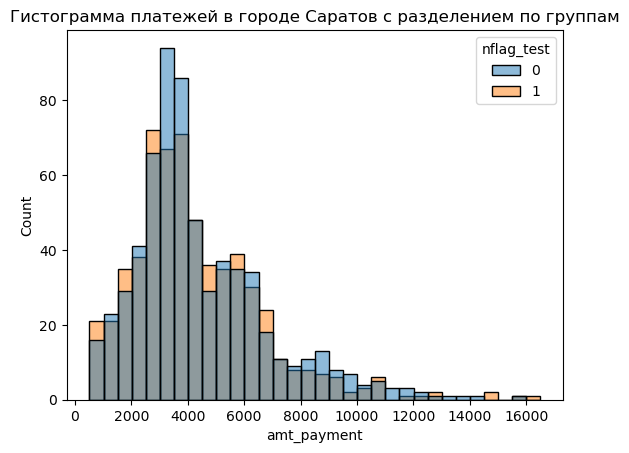

Нет статистически значимой разницы между средними
В городе Саратов нет статистически значимой разницы в конверсии в платеж


C:\Users\v_ush\AppData\Local\Temp\ipykernel_11436\3133867677.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p = stats.ttest_ind(r1, r2)


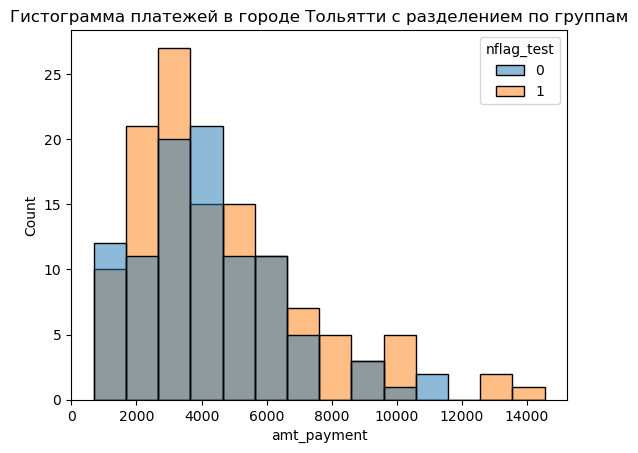

C:\Users\v_ush\AppData\Local\Temp\ipykernel_11436\3133867677.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p = stats.ttest_ind(r1, r2)


Нет статистически значимой разницы между средними
В городе Тольятти нет статистически значимой разницы в конверсии в платеж


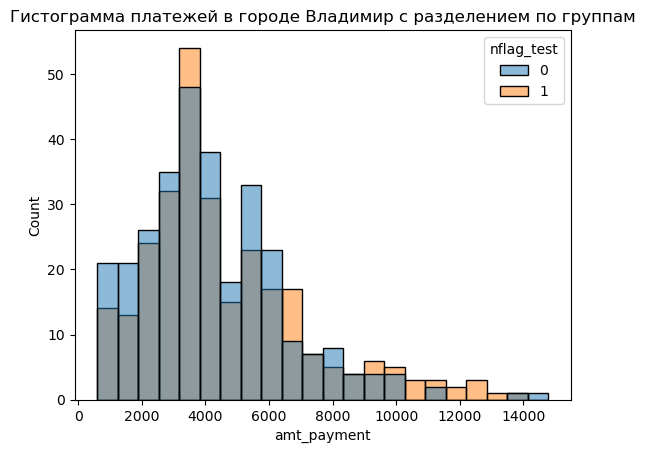

Нет статистически значимой разницы между средними
В городе Владимир нет статистически значимой разницы в конверсии в платеж


C:\Users\v_ush\AppData\Local\Temp\ipykernel_11436\3133867677.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p = stats.ttest_ind(r1, r2)


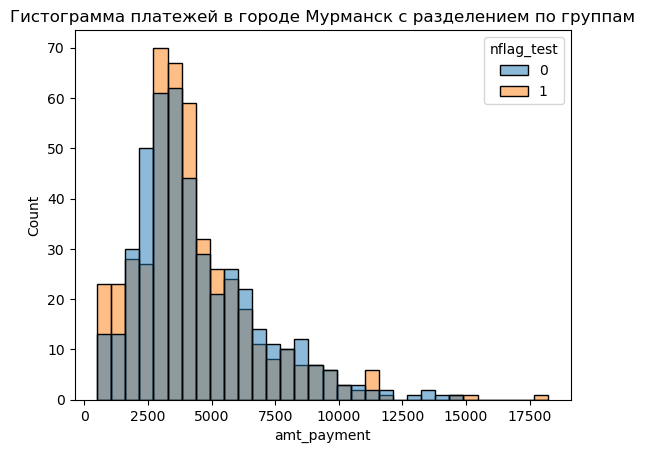

C:\Users\v_ush\AppData\Local\Temp\ipykernel_11436\3133867677.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p = stats.ttest_ind(r1, r2)


Нет статистически значимой разницы между средними
В городе Мурманск нет статистически значимой разницы в конверсии в платеж


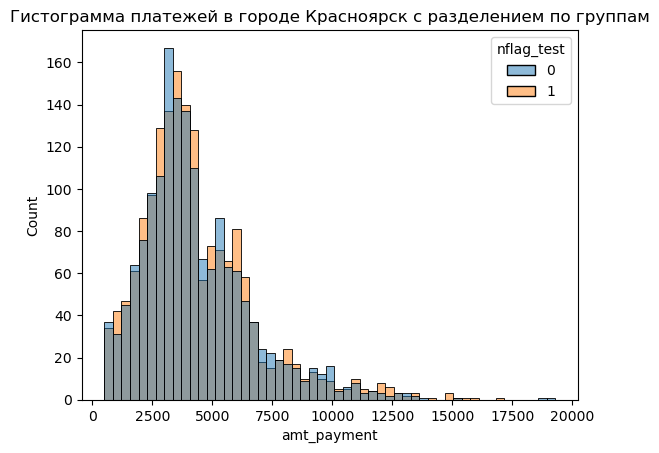

C:\Users\v_ush\AppData\Local\Temp\ipykernel_11436\3133867677.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p = stats.ttest_ind(r1, r2)


Нет статистически значимой разницы между средними
В городе Красноярск нет статистически значимой разницы в конверсии в платеж


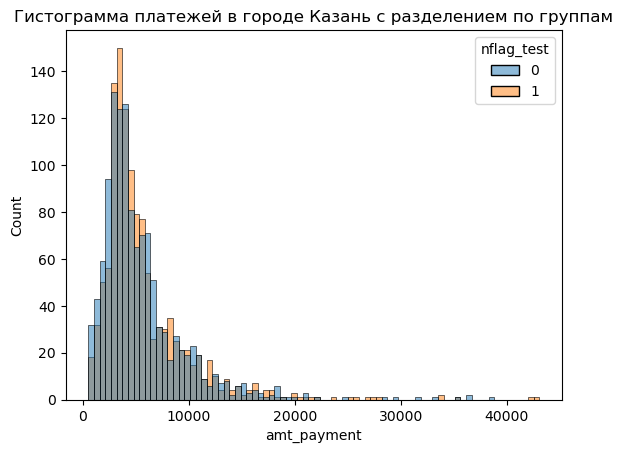

Нет статистически значимой разницы между средними
В городе Казань нет статистически значимой разницы в конверсии в платеж


C:\Users\v_ush\AppData\Local\Temp\ipykernel_11436\3133867677.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p = stats.ttest_ind(r1, r2)


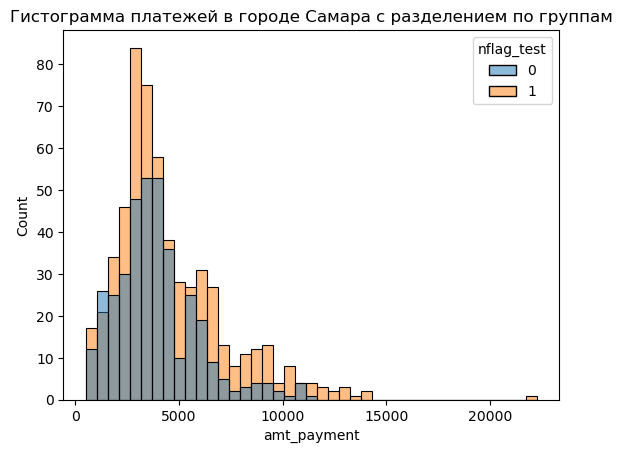

C:\Users\v_ush\AppData\Local\Temp\ipykernel_11436\3133867677.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p = stats.ttest_ind(r1, r2)


Нет статистически значимой разницы между средними
В городе Самара нет статистически значимой разницы в конверсии в платеж


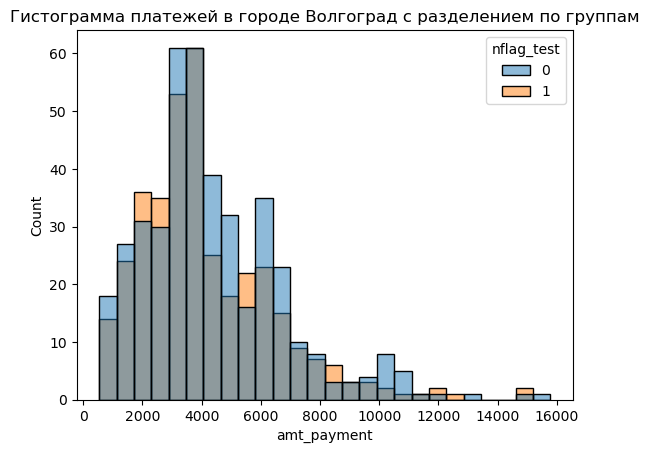

C:\Users\v_ush\AppData\Local\Temp\ipykernel_11436\3133867677.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p = stats.ttest_ind(r1, r2)


Нет статистически значимой разницы между средними
В городе Волгоград нет статистически значимой разницы в конверсии в платеж


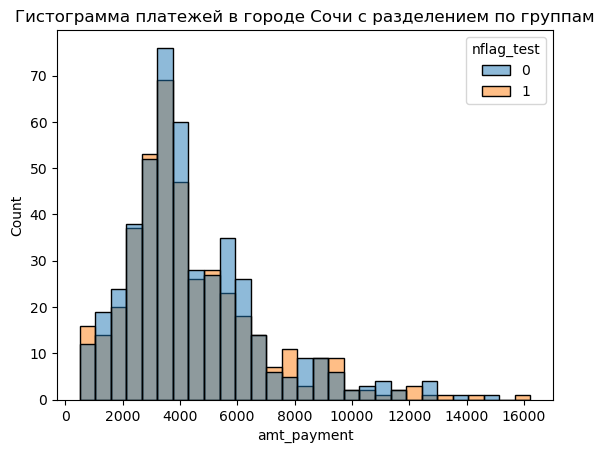

Нет статистически значимой разницы между средними
В городе Сочи нет статистически значимой разницы в конверсии в платеж


C:\Users\v_ush\AppData\Local\Temp\ipykernel_11436\3133867677.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p = stats.ttest_ind(r1, r2)


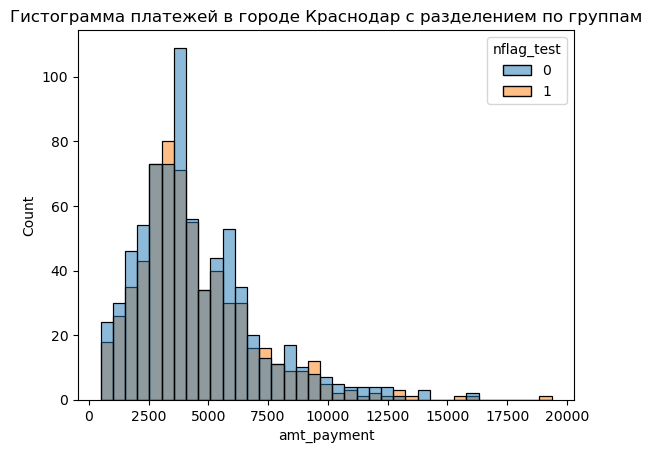

Нет статистически значимой разницы между средними
В городе Краснодар нет статистически значимой разницы в конверсии в платеж


C:\Users\v_ush\AppData\Local\Temp\ipykernel_11436\3133867677.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p = stats.ttest_ind(r1, r2)


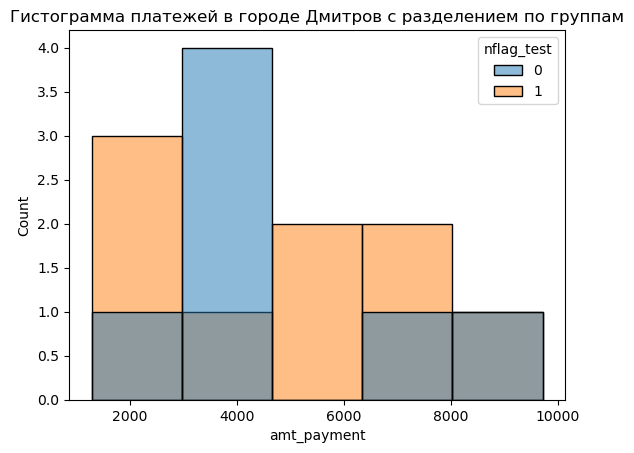

C:\Users\v_ush\AppData\Local\Temp\ipykernel_11436\3133867677.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p = stats.ttest_ind(r1, r2)


Нет статистически значимой разницы между средними
В городе Дмитров нет статистически значимой разницы в конверсии в платеж


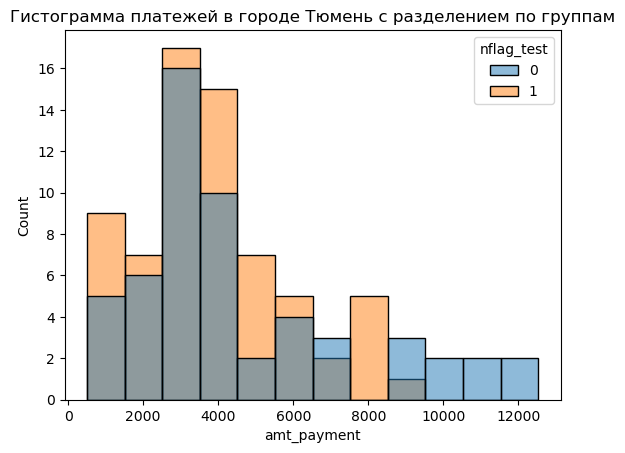

Нет статистически значимой разницы между средними
В городе Тюмень нет статистически значимой разницы в конверсии в платеж


C:\Users\v_ush\AppData\Local\Temp\ipykernel_11436\3133867677.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p = stats.ttest_ind(r1, r2)


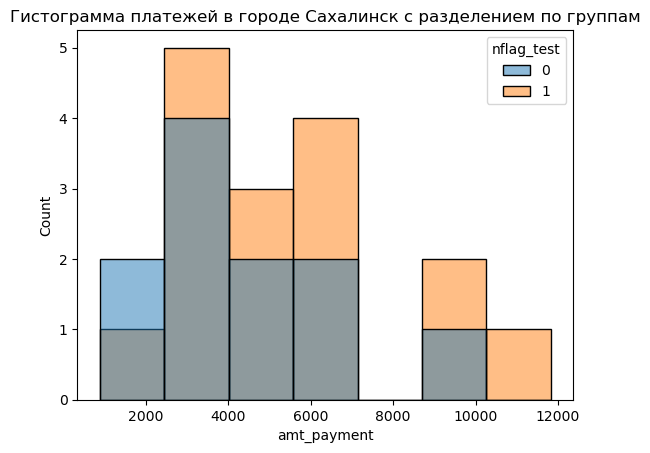

Нет статистически значимой разницы между средними
В городе Сахалинск нет статистически значимой разницы в конверсии в платеж


C:\Users\v_ush\AppData\Local\Temp\ipykernel_11436\3133867677.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p = stats.ttest_ind(r1, r2)


In [26]:
other_cities = df_filtered[~df_filtered['city'].isin(['Москва', 'Санкт-Петербург'])]['city'].unique()

# Проход по каждому городу и проведение аналитики
for city in other_cities:
    df_city = df_filtered[df_filtered['city'] == city]

# Построил гистограммы платежей с разделением по группам "тест" и "контроль"
    sns.histplot(data=df_city, x='amt_payment', hue='nflag_test')
    plt.title(f'Гистограмма платежей в городе {city} с разделением по группам')
    plt.show()

# Вычислил статистические значимости разницы конверсии в платеж
    r1 = df_city[df_city['nflag_test'] == 1]['nflag_paid']
    r2 = df_city[df_city['nflag_test'] == 0]['nflag_paid']
    alpha = 0.05

    t, p = test_calc(r1, r2, alpha)

    if p < alpha:
        print(f"В городе {city} существует статистически значимая разница в конверсии в платеж")
    else:
        print(f"В городе {city} нет статистически значимой разницы в конверсии в платеж")


In [27]:
###############################################################################################################################

In [28]:
# Создал пустой DataFrame
final_df = pd.DataFrame(
columns=['city', 'id_trading_point', 'count_test', 'count_control', 'count_all',
'percent_count', 'avg_payment_test', 'avg_payment_control', 'diff',
'sigma_test', 'sigma_control', 'ttest', 'pvalue_ttest']
)

# Цикл по всем городам
for city in df_fin['city'].unique():
    df_city = df_fin[df_fin['city'] == city]

# Цикл по торговым точкам в каждом городе
    for id_point in df_city['id_trading_point'].unique():
        df_point = df_city[df_city['id_trading_point'] == id_point]

        count_test = df_point[df_point['nflag_test'] == 1]['id_client'].count()
        count_control = df_point[df_point['nflag_test'] == 0]['id_client'].count()
        count_all = df_point['id_client'].count()
        percent_count = count_all / df_filtered['id_client'].count() * 100
        avg_payment_test = df_point[df_point['nflag_test'] == 1]['amt_payment'].mean()
        avg_payment_control = df_point[df_point['nflag_test'] == 0]['amt_payment'].mean()
        diff = avg_payment_test - avg_payment_control
        sigma_test = df_point[df_point['nflag_test'] == 1]['amt_payment'].std()
        sigma_control = df_point[df_point['nflag_test'] == 0]['amt_payment'].std()
        ttest, pvalue_ttest = stats.ttest_ind(df_point[df_point['nflag_test'] == 1]['amt_payment'],
        df_point[df_point['nflag_test'] == 0]['amt_payment'])

# Добавление данных в DataFrame
        final_df = final_df.append({
        'city': city,
        'id_trading_point': id_point,
        'count_test': count_test,
        'count_control': count_control,
        'count_all': count_all,
        'percent_count': percent_count,
        'avg_payment_test': avg_payment_test,
        'avg_payment_control': avg_payment_control,
        'diff': diff,
        'sigma_test': sigma_test,
        'sigma_control': sigma_control,
        'ttest': ttest,
        'pvalue_ttest': pvalue_ttest
        }, ignore_index=True)

# Вывод результата для всех городов
final_df

C:\Users\v_ush\AppData\Local\Temp\ipykernel_11436\2705382124.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append({
C:\Users\v_ush\AppData\Local\Temp\ipykernel_11436\2705382124.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append({
C:\Users\v_ush\AppData\Local\Temp\ipykernel_11436\2705382124.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append({
C:\Users\v_ush\AppData\Local\Temp\ipykernel_11436\2705382124.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append({
C:\Users\v_ush\AppData\Local\Temp\ipykernel_11436\2705382124.py:29: Futu

,city,id_trading_point,count_test,count_control,count_all,percent_count,avg_payment_test,avg_payment_control,diff,sigma_test,sigma_control,ttest,pvalue_ttest
0,Санкт-Петербург,453.0,1066,1049,2115,8.952381,2501.966229,1889.923737,612.042492,2993.442540,2648.659303,4.976910,6.983207e-07
1,Санкт-Петербург,112.0,652,683,1335,5.650794,2488.115031,2218.636896,269.478135,2778.179183,2780.790660,1.770712,7.683710e-02
2,Санкт-Петербург,117.0,625,587,1212,5.130159,2582.297600,2050.691652,531.605948,2835.004503,2595.737792,3.398196,7.003817e-04
3,Санкт-Петербург,309.0,240,238,478,2.023280,2706.279167,2392.894958,313.384209,2814.939849,2761.938716,1.228455,2.198834e-01
4,Санкт-Петербург,576.0,630,657,1287,5.447619,1594.436508,1342.129376,252.307132,2683.727211,2415.822664,1.774073,7.628783e-02
5,Санкт-Петербург,900.0,335,341,676,2.861376,2450.991045,1689.791789,761.199256,2865.607356,2492.472611,3.686914,2.452534e-04
6,Санкт-Петербург,213.0,232,255,487,2.061376,2977.629310,2277.611765,700.017546,2905.494362,2710.043413,2.750752,6.168215e-03
7,Санкт-Петербург,801.0,225,212,437,1.849735,2925.142222,2352.283019,572.859203,2774.292063,2928.285838,2.099991,3.630501e-02
8,Санкт-Петербург,573.0,177,160,337,1.426455,2929.045198,1641.212500,1287.832698,3201.098137,2619.044781,4.016569,7.294074e-05
9,Санкт-Петербург,891.0,159,167,326,1.379894,2618.949686,1980.658683,638.291003,2899.782464,2489.571942,2.135593,3.346204e-02


In [45]:
final_df['outcome_flag'] = np.where((final_df['pvalue_ttest'] < .05) & (final_df['diff'] > 0), 'Positive'
                                , np.where((final_df['pvalue_ttest'] < .05) & (final_df['diff'] < 0), 'Negative', 'No diff'))
final_df['percent_count'] = (final_df['count_all'] / final_df['count_all'].sum())
    


In [46]:
final_df[final_df['outcome_flag']=='No diff']

,city,id_trading_point,count_test,count_control,count_all,percent_count,avg_payment_test,avg_payment_control,diff,sigma_test,sigma_control,ttest,pvalue_ttest,outcome_flag
1,Санкт-Петербург,112.0,652,683,1335,0.029458,2488.115031,2218.636896,269.478135,2778.179183,2780.790660,1.770712,0.076837,No diff
3,Санкт-Петербург,309.0,240,238,478,0.010548,2706.279167,2392.894958,313.384209,2814.939849,2761.938716,1.228455,0.219883,No diff
4,Санкт-Петербург,576.0,630,657,1287,0.028399,1594.436508,1342.129376,252.307132,2683.727211,2415.822664,1.774073,0.076288,No diff
10,Санкт-Петербург,394.0,104,85,189,0.004171,1229.644231,973.623529,256.020701,2208.227840,1940.854825,0.836825,0.403759,No diff
12,Москва,3786.0,237,278,515,0.011364,2613.683544,2688.230216,-74.546672,2712.235859,3292.937641,-0.277399,0.781586,No diff
15,Москва,3987.0,801,785,1586,0.034997,1602.995006,1639.857325,-36.862319,2518.829205,2686.317417,-0.281965,0.778007,No diff
16,Москва,2212.0,422,397,819,0.018072,2813.168246,2739.362720,73.805526,3196.888861,2446.975036,0.369337,0.711972,No diff
17,Москва,8543.0,148,140,288,0.006355,1859.777027,1804.250000,55.527027,2568.980429,3015.726630,0.168506,0.866304,No diff
18,Москва,6543.0,662,689,1351,0.029812,1702.439577,1528.325109,174.114468,2453.901717,2338.522063,1.335377,0.181978,No diff
19,Москва,9121.0,131,108,239,0.005274,1976.854962,1856.944444,119.910517,2605.797427,2442.326166,0.364183,0.716046,No diff


In [31]:
pip --version


pip 23.2.1 from C:\ProgramData\anaconda3\Lib\site-packages\pip (python 3.11)

Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install xlsxwriter

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [47]:
import xlsxwriter

workbook = xlsxwriter.Workbook('final.xlsx')

outcomes = final_df['outcome_flag'].unique()

for outcome in outcomes:

    filtered_df = final_df[final_df['outcome_flag'] =='No diff']
worksheet = workbook.add_worksheet(f'{outcome} outcome')
for col_num, col_name in enumerate(filtered_df.columns):
    worksheet.write(0, col_num, col_name)
for row_num, row_data in enumerate(filtered_df.values, start=1):
    for col_num, value in enumerate(row_data):
        worksheet.write(row_num, col_num, value)
    
workbook.close()
